In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Set project root to ml_project directory
if os.getcwd().endswith('src'):
    os.chdir('..')
    
project_root = os.getcwd()
print(f"Working directory: {project_root}")

# Load datasets
main_df = pd.read_pickle("data/merged_learn_dataset.pkl")

# Split
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=0)

Working directory: /Users/arthur/Documents/Universite/M2-QEA/Machine Learning/final_project/ml_project


In [40]:
# Check data structure
print(f"Dataset shape: {main_df.shape}")
print(f"\nColumn types:\n{main_df.dtypes.value_counts()}")
print(f"\nFirst few columns: {list(main_df.columns[:10])}")
print(f"\nMissing values: {main_df.isnull().sum().sum()}")
print(f"\nTarget column present: {'target' in main_df.columns}")


Dataset shape: (50044, 785)

Column types:
bool       773
float64      9
int64        3
Name: count, dtype: int64

First few columns: ['primary_key', 'AGE_2018', 'Studying', 'target', 'Earnings', 'WORKING_HOURS', 'retirement_age', 'RETIREMENT_INCOME', 'Categorie', 'Inhabitants']

Missing values: 225567

Target column present: True


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Simple pipeline for preprocessed data (already one-hot encoded)
# Since data is already preprocessed, we only need imputation and optional scaling

# Separate features and target
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

# Create pipelines for different models
rf_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))
])

hgb_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', HistGradientBoostingRegressor(random_state=42))
])

# Train both models
print("Training Random Forest...")
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("✓ Random Forest trained")

print("\nTraining HistGradientBoosting...")
hgb_pipeline.fit(X_train, y_train)
hgb_predictions = hgb_pipeline.predict(X_test)
print("✓ HistGradientBoosting trained")


Training Random Forest...


/opt/anaconda3/envs/dauphine-ml/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Libellé']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/dauphine-ml/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Libellé']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✓ Random Forest trained

Training HistGradientBoosting...


/opt/anaconda3/envs/dauphine-ml/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Libellé']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✓ HistGradientBoosting trained


/opt/anaconda3/envs/dauphine-ml/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Libellé']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Calculate metrics for HistGradientBoosting
hgb_mse = mean_squared_error(y_test, hgb_predictions)
hgb_rmse = np.sqrt(hgb_mse)
hgb_r2 = r2_score(y_test, hgb_predictions)

# Display comparison
print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)
print(f"\n{'Metric':<25} {'Random Forest':<17} {'HistGradientBoosting':<17}")
print("-" * 60)
print(f"{'Mean Squared Error':<25} {rf_mse:<17.4f} {hgb_mse:<17.4f}")
print(f"{'Root Mean Squared Error':<25} {rf_rmse:<17.4f} {hgb_rmse:<17.4f}")
print(f"{'R² Score':<25} {rf_r2:<17.4f} {hgb_r2:<17.4f}")
print("=" * 60)

# Determine best model
best_model = "Random Forest" if rf_r2 > hgb_r2 else "HistGradientBoosting"
print(f"\n✓ Best model: {best_model} (R² = {max(rf_r2, hgb_r2):.4f})")


MODEL COMPARISON

Metric                    Random Forest     HistGradientBoosting
------------------------------------------------------------
Mean Squared Error        0.0191            0.0175           
Root Mean Squared Error   0.1382            0.1323           
R² Score                  0.7984            0.8153           

✓ Best model: HistGradientBoosting (R² = 0.8153)


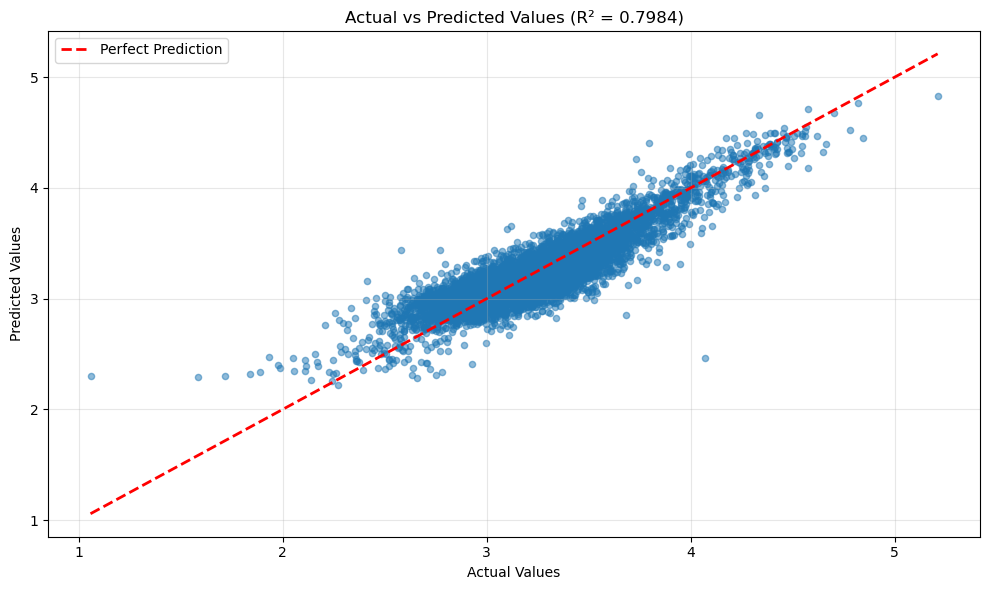

In [ ]:
import matplotlib.pyplot as plt

# Create side-by-side comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest plot
axes[0].scatter(y_test, rf_predictions, alpha=0.5, s=20, color='blue')
min_val_rf = min(y_test.min(), rf_predictions.min())
max_val_rf = max(y_test.max(), rf_predictions.max())
axes[0].plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Random Forest (R² = {rf_r2:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# HistGradientBoosting plot
axes[1].scatter(y_test, hgb_predictions, alpha=0.5, s=20, color='green')
min_val_hgb = min(y_test.min(), hgb_predictions.min())
max_val_hgb = max(y_test.max(), hgb_predictions.max())
axes[1].plot([min_val_hgb, max_val_hgb], [min_val_hgb, max_val_hgb], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'HistGradientBoosting (R² = {hgb_r2:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
